<a href="https://colab.research.google.com/github/joncalle/AnalToolsDecMrk/blob/main/Marketing_Analytics_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group - 9

Danielle do Val Goncalves Tudeia - W0823569

Fernanda Barbieri de Camargo - W0825882

Jonathan Calle - W0825959

Jonathan Chukwuma Oteh - W0775057

Luis Patricio Ramirez Fernandez - W0811391

### **Objective:**
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [1]:
!pip install rfpimp
!pip install category_encoders
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=fe64a0add1578a1a2da8930529c9ea689630ba9859b647059399ec9687732f35
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-a

In [2]:
# Import all the modules that were used in this project
import numpy as np
import pandas as pd
import warnings
from rfpimp import *
import seaborn as sns
import category_encoders as ce
from sklearn import tree
from pandas.api.types import is_string_dtype, is_object_dtype, is_categorical_dtype, is_string_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pandas_profiling import ProfileReport
warnings.filterwarnings("ignore")

<ipython-input-2-cec9b27ef0eb>:15: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/python/Sales_data.csv", encoding='latin-1', dtype={'CustomerID': str,'InvoiceID': str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


1.2. Display the top 10 rows of the dataframe:

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
InvoiceNo,536365,536365,536365,536365,536365,536365,536365,536366,536366,536367
StockCode,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT
Quantity,6,6,8,6,6,2,6,6,6,32
InvoiceDate,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:28,12/1/2010 8:28,12/1/2010 8:34
UnitPrice,2.55,3.39,2.75,3.39,3.39,7.65,4.25,1.85,1.85,1.69
CustomerID,17850,17850,17850,17850,17850,17850,17850,17850,17850,13047
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


1.3. Check for missing values:



In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df_cleaned = df.dropna()

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1.4. Convert the InvoiceDate column to datetime format:



In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [10]:
print("DataFrame after converting 'InvoiceDate' to datetime:")
print(df)

DataFrame after converting 'InvoiceDate' to datetime:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               Invoic

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [12]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [14]:
unique_products_count = df['StockCode'].nunique()
unique_products_count

4070

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [15]:
product_quantity = df.groupby('StockCode')['Quantity'].sum()
top_10_products = product_quantity.sort_values(ascending=False).head(10)
top_10_products

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64

2.3. How many unique customers are there in the dataset?



In [16]:
unique_CustomerID_count = df['CustomerID'].nunique()
unique_CustomerID_count

4372

2.4. Which country has the maximum number of unique customers?



In [17]:
unique_customers_by_country = df.groupby('Country')['CustomerID'].nunique()
max_customers_country = unique_customers_by_country.idxmax()

print("Country with the maximum number of unique customers:", max_customers_country)
print("Number of unique customers in", max_customers_country + ":", unique_customers_by_country[max_customers_country])

Country with the maximum number of unique customers: United Kingdom
Number of unique customers in United Kingdom: 3950


2.5. Visualize the distribution of 'TotalPrice' using a histogram.



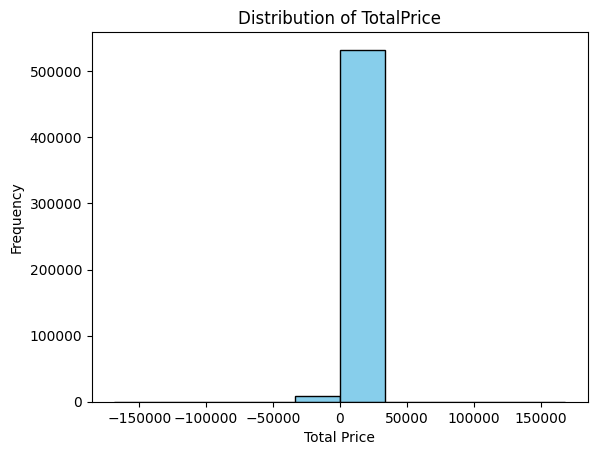

In [18]:


plt.hist(df['TotalPrice'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of TotalPrice')
plt.show()

## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [19]:

# Assuming df is your DataFrame with columns TotalPrice and Country
# Group by Country and sum TotalPrice for each country
total_sales_per_country = df.groupby('Country')['TotalPrice'].sum()

# Display the total sales per country
print(total_sales_per_country)


Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

3.2. Identify the month in which the sales were highest.



In [20]:
# Convert the 'InvoiceDate' column to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month and year from the 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.to_period('M')

total_sales_per_month = df.groupby('Month')['TotalPrice'].sum()

# Find the month with the highest total sales
highest_sales_month = total_sales_per_month.idxmax()

# Display the month with the highest sales
print('The month with the highest sales is:', highest_sales_month)

The month with the highest sales is: 2011-11


3.3. Compute the average unit price per product.



In [21]:
average_unit_price_per_product = df.groupby('StockCode')['UnitPrice'].mean()

# Display the average unit price per product
print(average_unit_price_per_product)

StockCode
10002            1.056849
10080            0.376667
10120            0.210000
10123C           0.487500
10123G           0.000000
                  ...    
gift_0001_20    15.038000
gift_0001_30    21.941250
gift_0001_40    33.566667
gift_0001_50    41.890000
m                2.550000
Name: UnitPrice, Length: 4070, dtype: float64


3.4. Compute the total quantity sold per customer.



In [22]:
total_quantity_per_customer = df.groupby('CustomerID')['Quantity'].sum()

# Display the total quantity sold per customer
print(total_quantity_per_customer)

CustomerID
12346       0
12347    2458
12348    2341
12349     631
12350     197
         ... 
18280      45
18281      54
18282      98
18283    1397
18287    1586
Name: Quantity, Length: 4372, dtype: int64


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



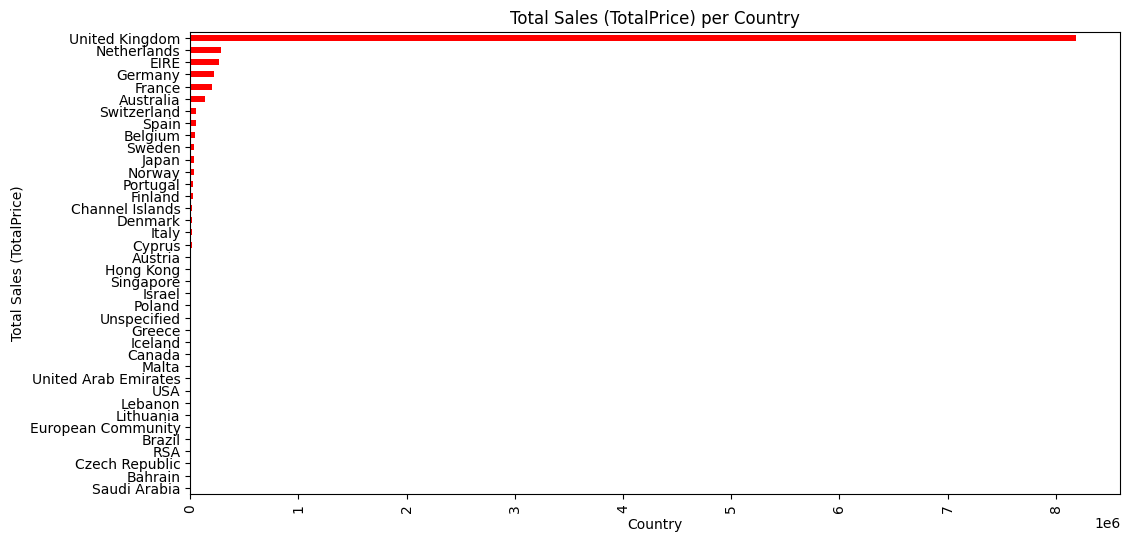

In [23]:
plt.figure(figsize=(12, 6))
total_sales_per_country.sort_values(ascending=True).plot(kind='barh', color='red')
plt.xlabel('Country')
plt.ylabel('Total Sales (TotalPrice)')
plt.title('Total Sales (TotalPrice) per Country')
plt.xticks(rotation=90)
plt.show()


4.2. Plot a line graph to showcase the trend of sales over time.



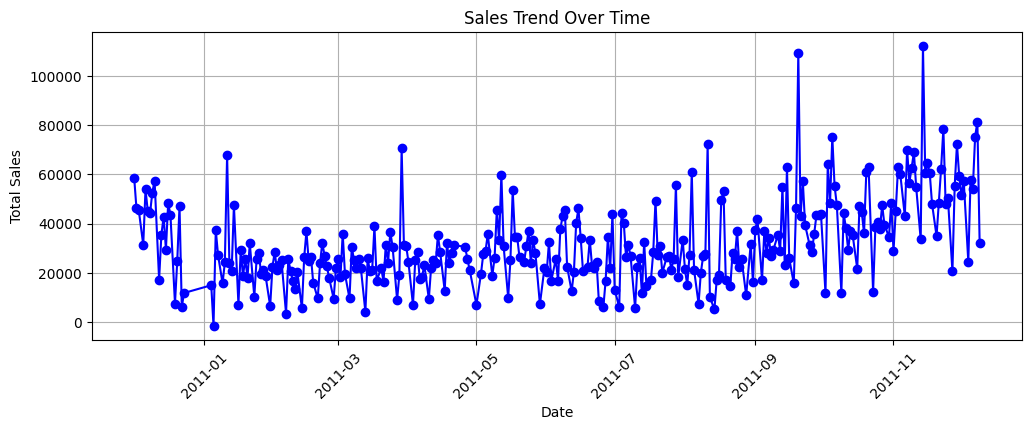

In [24]:
# Assuming df is your DataFrame with the appropriate structure
# Assuming 'InvoiceDate' is in the correct datetime format

# Extracting date and total sales
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



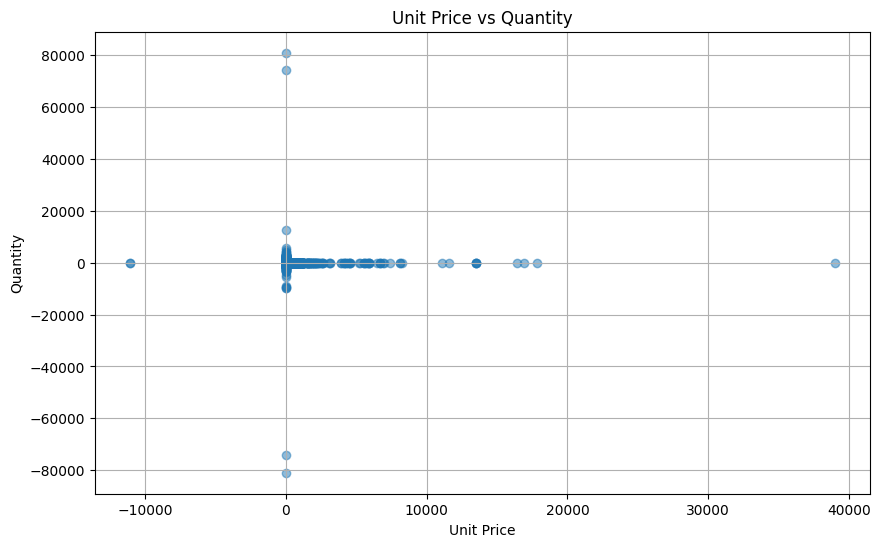

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['Quantity'], alpha=0.5)
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Unit Price vs Quantity')
plt.grid(True)
plt.show()

4.4. Plot a heatmap to display the correlation between numeric columns.



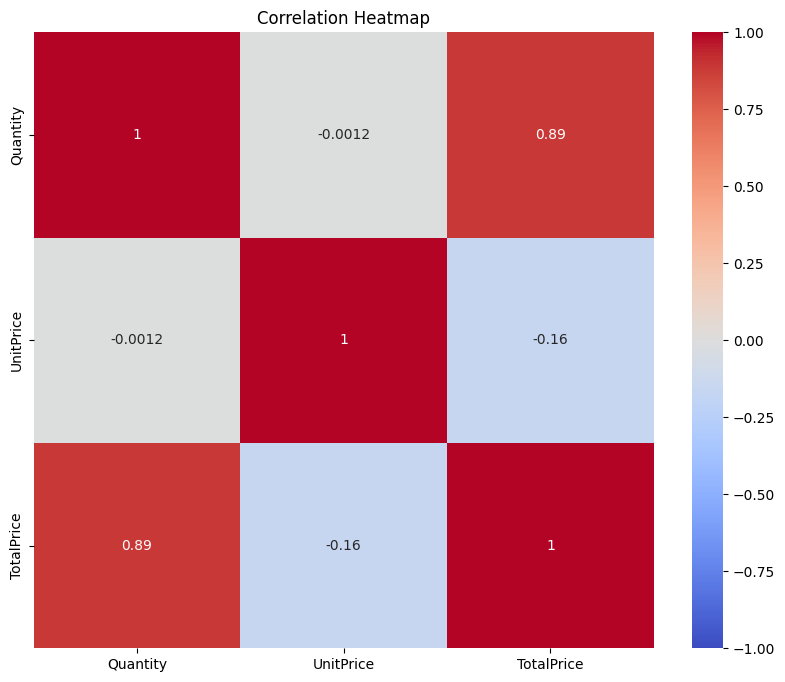

In [26]:
import seaborn as sns

correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



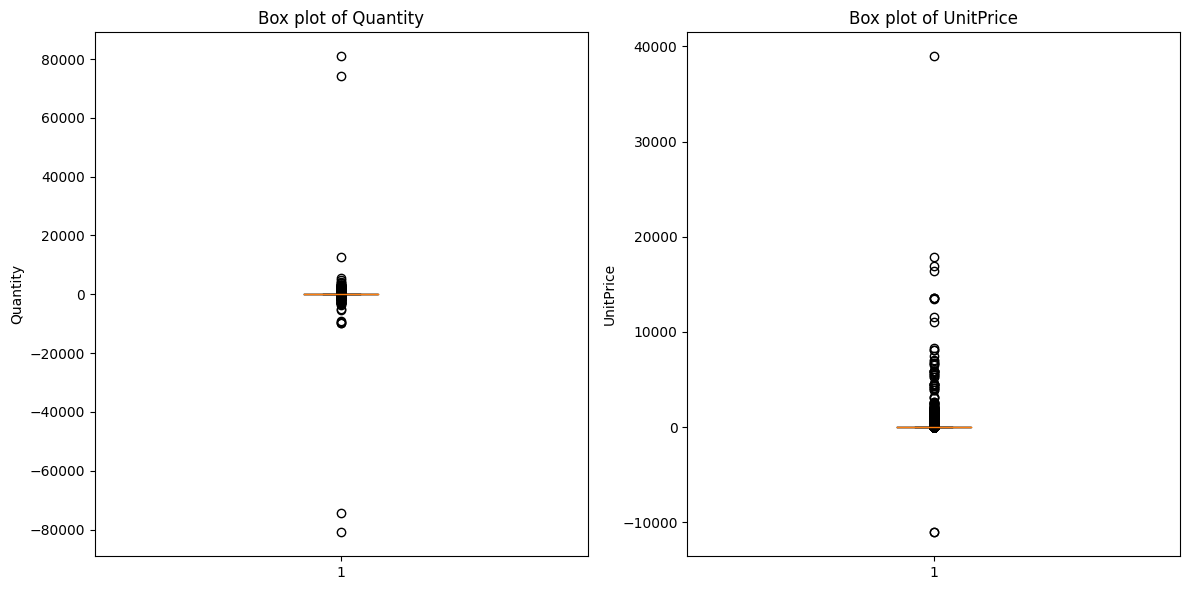

In [27]:
plt.figure(figsize=(12, 6))

# Box plot for Quantity
plt.subplot(1, 2, 1)
plt.boxplot(df['Quantity'])
plt.title('Box plot of Quantity')
plt.ylabel('Quantity')

# Box plot for UnitPrice
plt.subplot(1, 2, 2)
plt.boxplot(df['UnitPrice'])
plt.title('Box plot of UnitPrice')
plt.ylabel('UnitPrice')

plt.tight_layout()
plt.show()

In [28]:
df = df[(df.UnitPrice >= 0) & (df.UnitPrice < 20000)]
df.shape

(541906, 10)

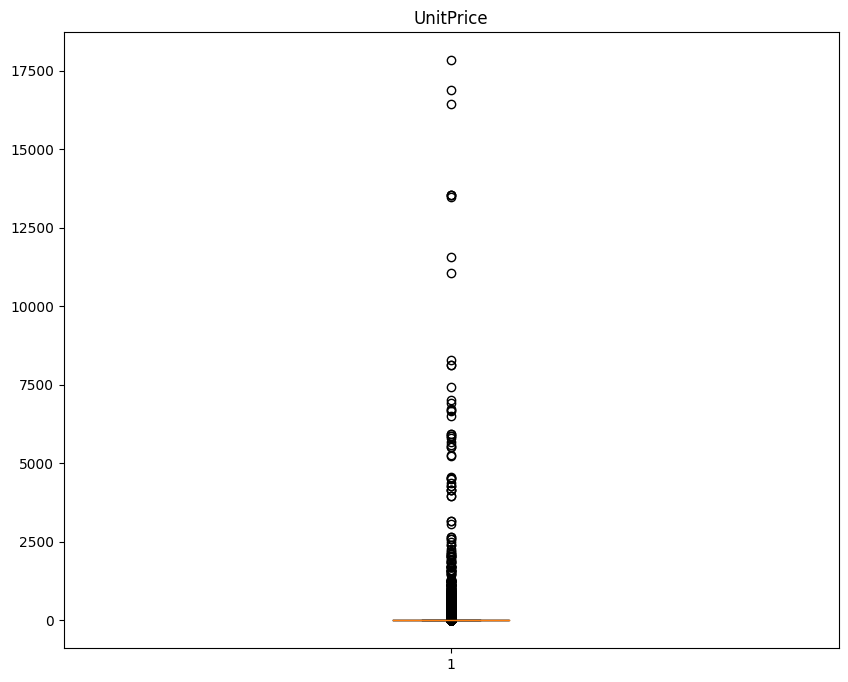

In [29]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['UnitPrice'])
plt.title('UnitPrice')
plt.show()

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



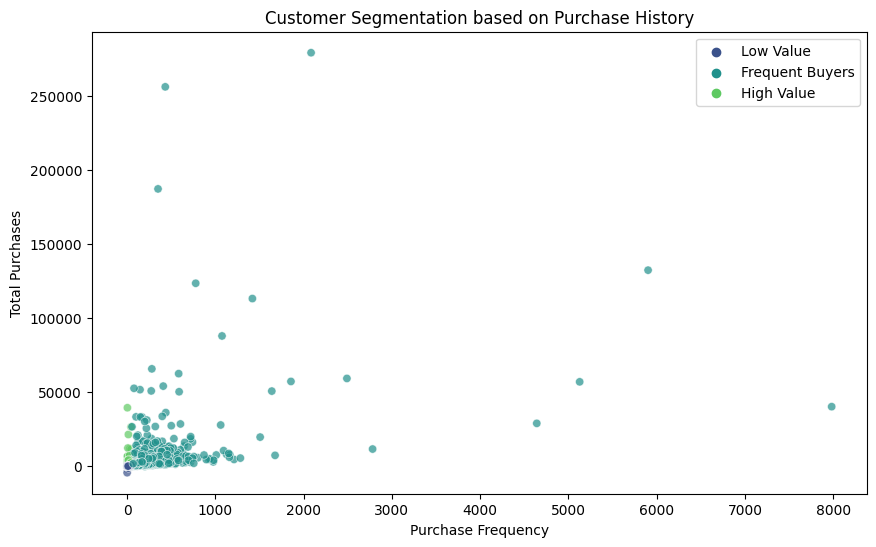

In [30]:
# Calculate total purchases for each customer
total_purchases = df.groupby('CustomerID')['TotalPrice'].sum()

# Calculate purchase frequency for each customer
purchase_frequency = df.groupby('CustomerID').size()

# Create a new DataFrame for segmentation
segmentation_df = pd.DataFrame({
    'TotalPurchases': total_purchases,
    'PurchaseFrequency': purchase_frequency
})

# Define segmentation criteria
segmentation_df['Segment'] = 'Low Value'
segmentation_df.loc[segmentation_df['TotalPurchases'] > 1000, 'Segment'] = 'High Value'
segmentation_df.loc[segmentation_df['PurchaseFrequency'] > 50, 'Segment'] = 'Frequent Buyers'

# Plot the segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='TotalPurchases', hue='Segment', data=segmentation_df, palette='viridis', alpha=0.7)
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Purchases')
plt.legend()
plt.show()

5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



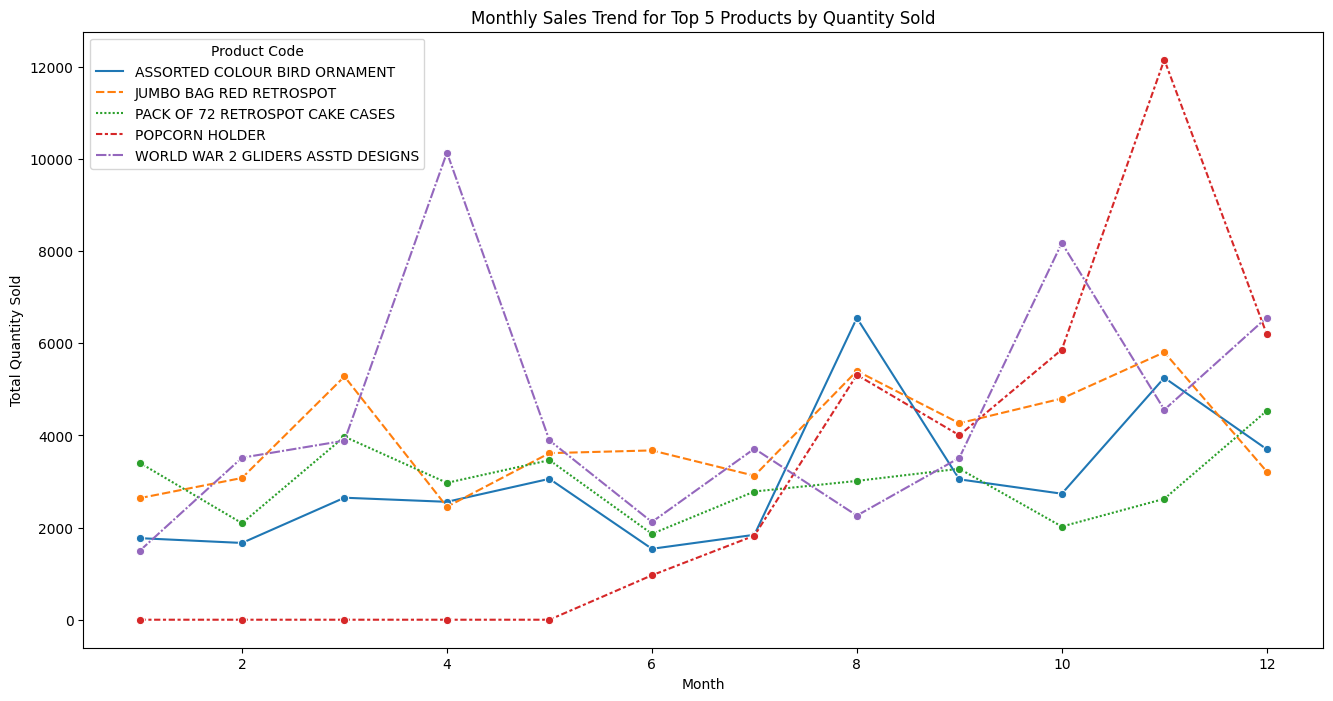

In [31]:
top_5_products = df.groupby('Description')['Quantity'].sum().nlargest(5).index
top_5_products_data = df[df['Description'].isin(top_5_products)]

# Extract the month from InvoiceDate
top_5_products_data['Month'] = top_5_products_data['InvoiceDate'].dt.month

# Obtain Monthly Sales
monthly_sales_top_5 = top_5_products_data.groupby(['Description', 'Month'])['Quantity'].sum().reset_index()

# Create a Pivot table for easy plotting
pivot_table = monthly_sales_top_5.pivot_table(index='Month', columns='Description', values='Quantity', fill_value=0)

# Plotting
plt.figure(figsize=(16, 8))
sns.lineplot(data=pivot_table, marker='o')
plt.title('Monthly Sales Trend for Top 5 Products by Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product Code', loc='upper left')
plt.show()

# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [32]:
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['Day'] = df.InvoiceDate.dt.day
df['Hour'] = df.InvoiceDate.dt.hour

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,8


6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [33]:
df['ReturnFlag'] = (df['Quantity'] < 0).astype(int)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year,Day,Hour,ReturnFlag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,1,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,1,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,1,8,0


## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [34]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days
}).reset_index().rename(columns={
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary',
    'InvoiceDate': 'Recency'
})
rfm

,CustomerID,Frequency,Monetary,Recency
0,12346,2,0.00,325
1,12347,7,4310.00,1
2,12348,4,1797.24,74
3,12349,1,1757.55,18
4,12350,1,334.40,309
...,...,...,...,...
4367,18280,1,180.60,277
4368,18281,1,80.82,180
4369,18282,3,176.60,7
4370,18283,16,2094.88,3


7.2. Normalize the RFM matrix with StandardScaler:

In [35]:
from sklearn.preprocessing import StandardScaler
rfm_data = rfm[['Frequency', 'Monetary', 'Recency']]
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)
rfm_normalized = pd.DataFrame(rfm_normalized, columns=rfm_data.columns)
rfm_normalized['CustomerID'] = rfm['CustomerID']
rfm_normalized

,Frequency,Monetary,Recency,CustomerID
0,-0.329337,-0.231529,2.322023,12346
1,0.206127,0.291646,-0.893733,12347
2,-0.115152,-0.013369,-0.169196,12348
3,-0.436430,-0.018187,-0.725005,12349
4,-0.436430,-0.190938,2.163220,12350
...,...,...,...,...
4367,-0.436430,-0.209607,1.845615,18280
4368,-0.436430,-0.221719,0.882873,18281
4369,-0.222244,-0.210092,-0.834182,18282
4370,1.169961,0.022761,-0.873883,18283


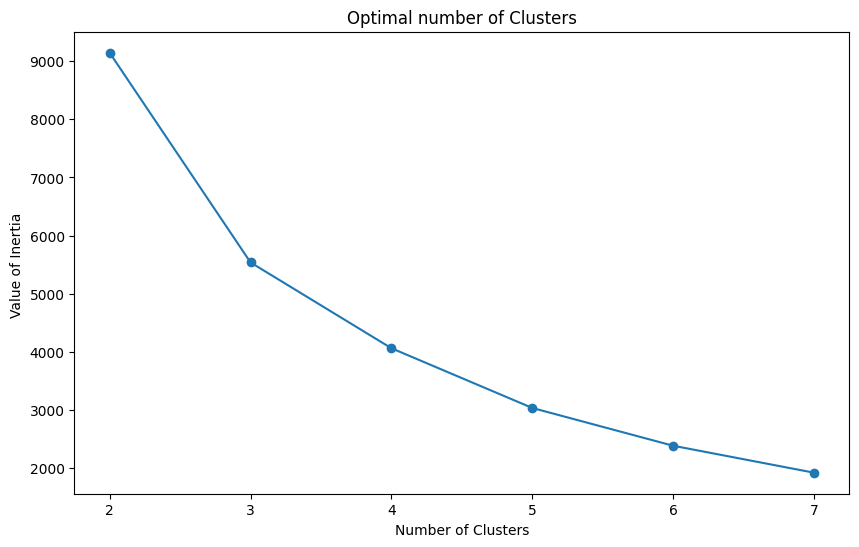

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

vals = []
for i in range(2, 8):
    model = KMeans(n_clusters=i)
    model.fit(rfm_normalized[['Frequency', 'Monetary', 'Recency']])
    vals.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), vals, marker='o')
plt.title('Optimal number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Inertia ')
plt.show()

7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

In [37]:
# For the Modeling with k = 4
model = KMeans(n_clusters=4)
rfm_normalized['Cluster'] = model.fit_predict(rfm_normalized[['Frequency','Monetary','Recency']])
rfm_normalized

,Frequency,Monetary,Recency,CustomerID,Cluster
0,-0.329337,-0.231529,2.322023,12346,1
1,0.206127,0.291646,-0.893733,12347,0
2,-0.115152,-0.013369,-0.169196,12348,0
3,-0.436430,-0.018187,-0.725005,12349,0
4,-0.436430,-0.190938,2.163220,12350,1
...,...,...,...,...,...
4367,-0.436430,-0.209607,1.845615,18280,1
4368,-0.436430,-0.221719,0.882873,18281,1
4369,-0.222244,-0.210092,-0.834182,18282,0
4370,1.169961,0.022761,-0.873883,18283,0


## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [38]:
df_mp = df[['Country', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour', 'ReturnFlag']]
df_mp.isna().sum()

# Encode Country using Frequency/Count Encoder
encoder = ce.CountEncoder(cols=['Country'])
df_mp = encoder.fit_transform(df_mp)




X =  df_mp.drop('ReturnFlag', axis=1)
y = df_mp.ReturnFlag

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the classification model (Random Forest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9828015722167888
Precision: 0.6098265895953757
Recall: 0.3025812619502868
F1 Score: 0.4044728434504792


In [39]:
!pip install scikit-learn

8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [40]:
from sklearn.metrics import mean_absolute_error
df_reg = df[['CustomerID','Quantity','UnitPrice','Country', 'TotalPrice', 'Year', 'Month', 'Day', 'Hour', 'ReturnFlag']]

# Encode Country & CustomerID with Count Encoder
encoder = ce.CountEncoder(cols=['Country','CustomerID'])
df_reg = encoder.fit_transform(df_reg)

x = df_reg.drop('TotalPrice', axis=1)
y = df_reg.TotalPrice

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

model_tp = RandomForestRegressor(n_estimators=120, oob_score=True)
model_tp.fit(x_train, y_train)
model_tp.score(x_test, y_test)

predictions = model_tp.predict(x_test)
print("MAE Score: {}".format(mean_absolute_error(predictions, y_test)))
print("R2 Score: {}".format(r2_score(predictions, y_test)))

MAE Score: 0.35044665519498286
R2 Score: 0.9549361253280788


## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [41]:
#! pip install mlxtend --q

from mlxtend.frequent_patterns import apriori, association_rules


basket = df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().fillna(0).reset_index().set_index('InvoiceNo')
basket

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1


# Encode the Basket Values using the Encode Function
basket_encoded = basket.applymap(encode)
basket_encoded

# Use the Apriori Algorithm to display the rules with over 3% support
freq_sets = apriori(basket_encoded, min_support=0.03, use_colnames=True)
freq_sets

# Generate rules
ass_rules = association_rules(freq_sets, metric="lift", min_threshold=1)
ass_rules

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041525,0.043612,0.031420,0.756650,17.349720,0.029609,3.930098,0.983189
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043612,0.041525,0.031420,0.720450,17.349720,0.029609,3.428638,0.985334
2,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.049830,0.085587,0.033752,0.677340,7.914063,0.029487,2.833983,0.919460
3,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.085587,0.049830,0.033752,0.394359,7.914063,0.029487,1.568868,0.955414


# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [42]:
#Products are

df_rev = df.groupby(['StockCode'])['TotalPrice'].sum().reset_index()
df_rev.sort_values('TotalPrice', ascending=False, inplace=True)


df_rev['CumilativeRevenue'] = df_rev['TotalPrice'].cumsum()


top_products = df_rev[df_rev['CumilativeRevenue'] <= 0.8 * df_rev.TotalPrice.sum()]
top_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,StockCode,TotalPrice,CumilativeRevenue
4059,DOT,206245.48,206245.48
1348,22423,164762.19,371007.67
2733,47566,98302.98,469310.65
3536,85123A,97894.50,567205.15
3515,85099B,92356.03,659561.18
...,...,...,...
627,21463,3230.05,7832750.14
1864,22962,3221.94,7835972.08
1656,22746,3219.74,7839191.82
304,20973,3213.52,7842405.34


In [43]:
# For Customer

df_cust = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
df_cust.sort_values('TotalPrice', ascending=False, inplace=True)


df_cust['CumulativeSales'] = df_cust.TotalPrice.cumsum()


top_cust = df_cust[df_cust.CumulativeSales <= 0.8*df_cust.TotalPrice.sum()]
top_cust

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,TotalPrice,CumulativeSales
1703,14646,279489.02,279489.020
4233,18102,256438.49,535927.510
3758,17450,187482.17,723409.680
1895,14911,132572.62,855982.300
55,12415,123725.45,979707.750
...,...,...,...
3373,16910,1510.06,6663807.891
2160,15265,1506.12,6665314.011
2428,15625,1504.56,6666818.571
462,12937,1504.27,6668322.841


12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


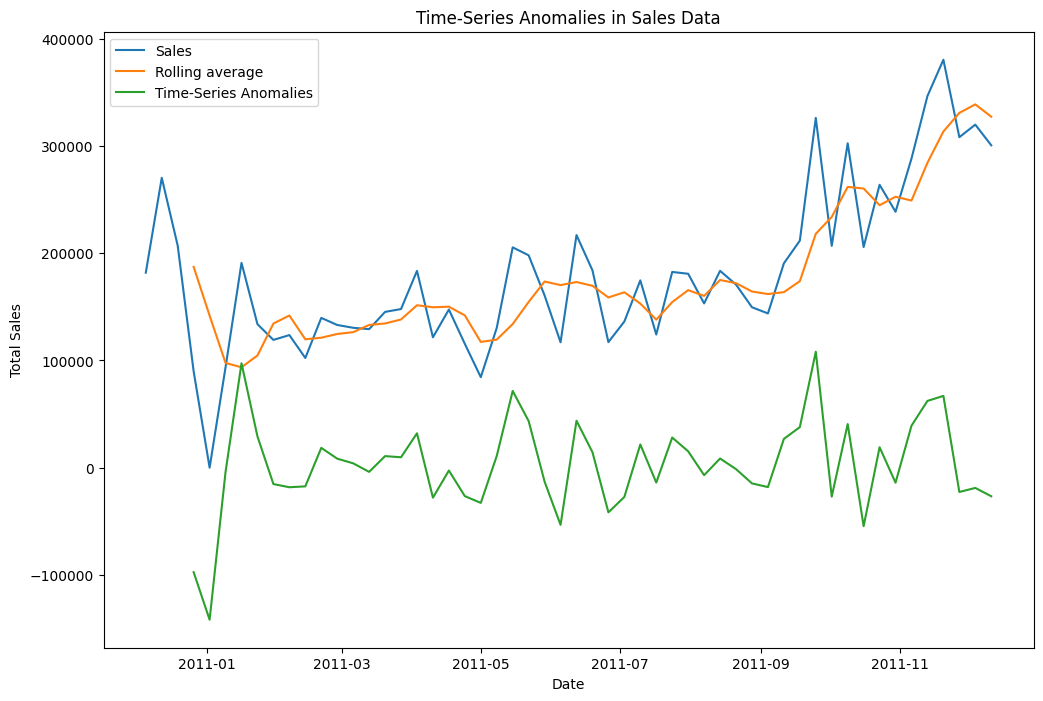

In [44]:
df_anomalies = df.set_index('InvoiceDate')

# Extract the Weekly sales
periodic_sales = df_anomalies['TotalPrice'].resample('W').sum()

# Set rolling_mean to 4 periods (4 weeks)
rolling_mean = periodic_sales.rolling(window=4).mean()

# Calculate Anomalies
anomalies = periodic_sales - rolling_mean

#Plotting
plt.figure(figsize=(12, 8))
plt.plot(periodic_sales, label='Sales')
plt.plot(rolling_mean, label='Rolling average')
plt.plot(anomalies, label='Time-Series Anomalies')
plt.title('Time-Series Anomalies in Sales Data')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

We calculate the sales per week and the rolling median once every four weeks.

The resulting line's Observed Peaks signify data anomalies.

Anomalies can be observed in the months of January, February, July, and October.

# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

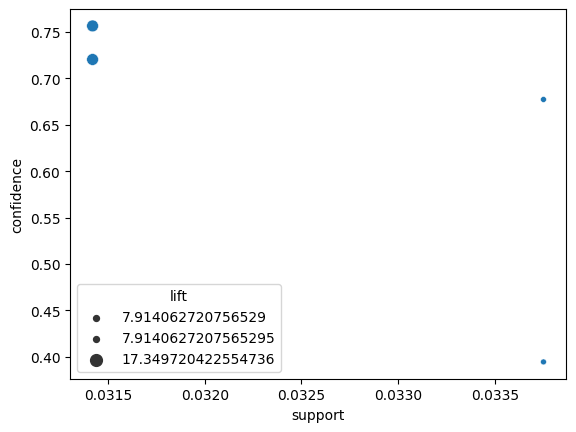

In [45]:
ass_rules = association_rules(freq_sets, metric='lift', min_threshold=0.1)
top_rules = ass_rules[ass_rules.confidence > 0.01]
sns.scatterplot(x='support',y='confidence',size='lift', data=top_rules)

We undertake market basket analysis to find the rules with high lift and confidence. Hence, the size denotes the lift, and the y-axis denotes the confidence.
As can be seen, there are a few locations with significant confidence and lift at 0.75 and 0.7.

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

In [48]:
# Generation pf  Matrix
from sklearn.metrics.pairwise import cosine_similarity

matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
re_indexed = matrix.reset_index()
cos_sim = cosine_similarity(matrix)
print (cos_sim )


def recommend(user_id, cos_sim=cos_sim):

    index = re_indexed[re_indexed['CustomerID']==user_id].index[0]

    scores = list(enumerate(cos_sim[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    user_idx = scores[1][0]

    similar_user_products = matrix.iloc[user_idx]
    recommended_products = similar_user_products[similar_user_products > 0].index.tolist()

    return recommended_products


stock_code_list = recommend(df.CustomerID[[0]].values[0])
stock_code_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.16829512 ... 0.01361578 0.03662907 0.10913087]
 [0.         0.16829512 1.         ... 0.         0.21171692 0.07188799]
 ...
 [0.         0.01361578 0.         ... 1.         0.02069621 0.        ]
 [0.         0.03662907 0.21171692 ... 0.02069621 1.         0.10262015]
 [0.         0.10913087 0.07188799 ... 0.         0.10262015 1.        ]]


['22168', '22170', '22171', '40003', '71038', '82482', '82494L', '85123A']

## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

In [49]:
df['LastPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
df['Churn'] = (df.InvoiceDate.max() - df.LastPurchase).dt.days > 180

print(df.Churn.value_counts())

df_churn = df[['Quantity','UnitPrice','Country', 'TotalPrice', 'Year', 'Month', 'Day', 'Hour', 'ReturnFlag','Churn']]

en = ce.CountEncoder(cols=['Country'])
df_churn = en.fit_transform(df_churn)

x = df_churn.drop('Churn', axis=1)
y = df_churn.Churn

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

model_tp = LogisticRegression()
model_tp.fit(x_train, y_train)
model_tp.score(x_test, y_test)

pred = model_tp.predict(x_test)

print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    520206
True      21700
Name: Churn, dtype: int64
              precision    recall  f1-score   support

       False       0.96      1.00      0.98    104135
        True       0.00      0.00      0.00      4247

    accuracy                           0.96    108382
   macro avg       0.48      0.50      0.49    108382
weighted avg       0.92      0.96      0.94    108382



To forecast churn, a new column called "Churn" is introduced.

Logistic Regression is applied in this instance to speed up execution.

It is based on the idea that consumers who haven't made any purchases in more than six months (180 days) have churned.

## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.

In [51]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(), parameter_grid, verbose=3)
grid.fit(x_train, y_train)

print(grid.best_params_)

pred = grid.predict(x_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   3.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   2.4s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   1.7s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   1.2s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   1.2s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.2s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.1s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.2s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.4s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.960 total time=   2.2s
[CV 2/5] END ..................C=10, penalty=l2;,

In [52]:
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

       False       0.96      1.00      0.98    104135
        True       0.00      0.00      0.00      4247

    accuracy                           0.96    108382
   macro avg       0.48      0.50      0.49    108382
weighted avg       0.92      0.96      0.94    108382



Here, the Grid Search approach is used for tuning hyperparameter.We changed the amount of regularisation and utilised the "L2" Regularisation method.
We want to make the forecasting Logistic Regression model of Churn better.